# Bike sharing assignment      
                                            __ by Rahul Negi

###### This assignment presents the Linear regression model for the prediction of demand for shared bikes.

## 1. Reading and understanding the data

In [1]:
# Importinf the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering out the warnings
import warnings 
warnings.filterwarnings('ignore')

# Setting the plots visuals
sns.set()
%config InlineBackend.figure_format='retina'

In [2]:
# Readind the data-set
bike = pd.read_csv('day.csv')
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
#Checking the rows and columns of the dataset
bike.shape

(730, 16)

In [4]:
# Checking the null values and data type of columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Changing the 'dteday' column into date time format
bike.dteday = pd.to_datetime(bike.dteday)

In [6]:
# Creating a weekend column
bike['weekend'] = bike.weekday.apply(lambda x:0 if (x==6 or x==0)  else 1)

# This variable is generated just to see whether the people are more interested in booking the 
# bikes during weekends(perticularly weekends excluduing national holidays).

In [7]:
bike.atemp.describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

In [8]:
# Creating bins to check which temperature slot is more prefred by people to rent bikes
# The temperature has been divided into 5 segments which has a difference of 10 degree celcius 
bins_labels = ["0-10","10-20","20-30","30-40","40-50"]
bike['atemp_bin'] = pd.qcut(bike.atemp,q=5,labels=bins_labels)

In [9]:
# Checking the statistical summary of all numeric columns
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt     weekend  
count   730.000000   730.000000   730.000000  730.000000  
mean    849.249315  3658.757534  4508.006849    0.715068  
std     686.479875  1559.758728  1936.011647    0.451691  
min       2.000000    20.000000    22.000000    0.000000  
25%     316.250000  2502.250000  3169.750000    0.000000  
50%     717.000000  3664.500000  4548.500000    1.000000  
75%    1096.500000  4783.250000  5966.000000    1.000000  
max    3410.000000  6946.000000  8714.000000    1.000000

In [10]:
# Mapping actual names of season into variables for creation of dummy variables
bike['season'] = bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"})

In [11]:
# Mapping actual names of year into variables for creation of dummy variables
bike['yr'] = bike['yr'].replace({0:2018,1:2019})

In [12]:
# Mapping actual names of mnth into variables for creation of dummy variables
bike['mnth'] = bike['mnth'].replace({1:"jan", 2:"feb",3:"mar", 4:"apr", 5:"may", 6:"jun", 7:"jul",
             8:"aug", 9:"sep",  10:"oct", 11:"nov",12:"dec"})

In [13]:
# Mapping actual names of weekday into variables for creation of dummy variables
bike['weekday'] = bike['weekday'].replace({1:"monday", 2:"tuesday",3:"wednesday", 4:"thrusday", 
                          5:"friday", 6:"saturday", 0:"sunday"})

In [14]:
# Mapping actual names of weathersit into variables for creation of dummy variables
bike['weathersit'] = bike['weathersit'].replace({1:"Clear",2:"Mist",3:"Light_snow",4:"Heavy_rain"})

## 2. Visualization of Data

In [15]:
# Checking for the columns in the list
list((bike.columns))

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'weekend',
 'atemp_bin']

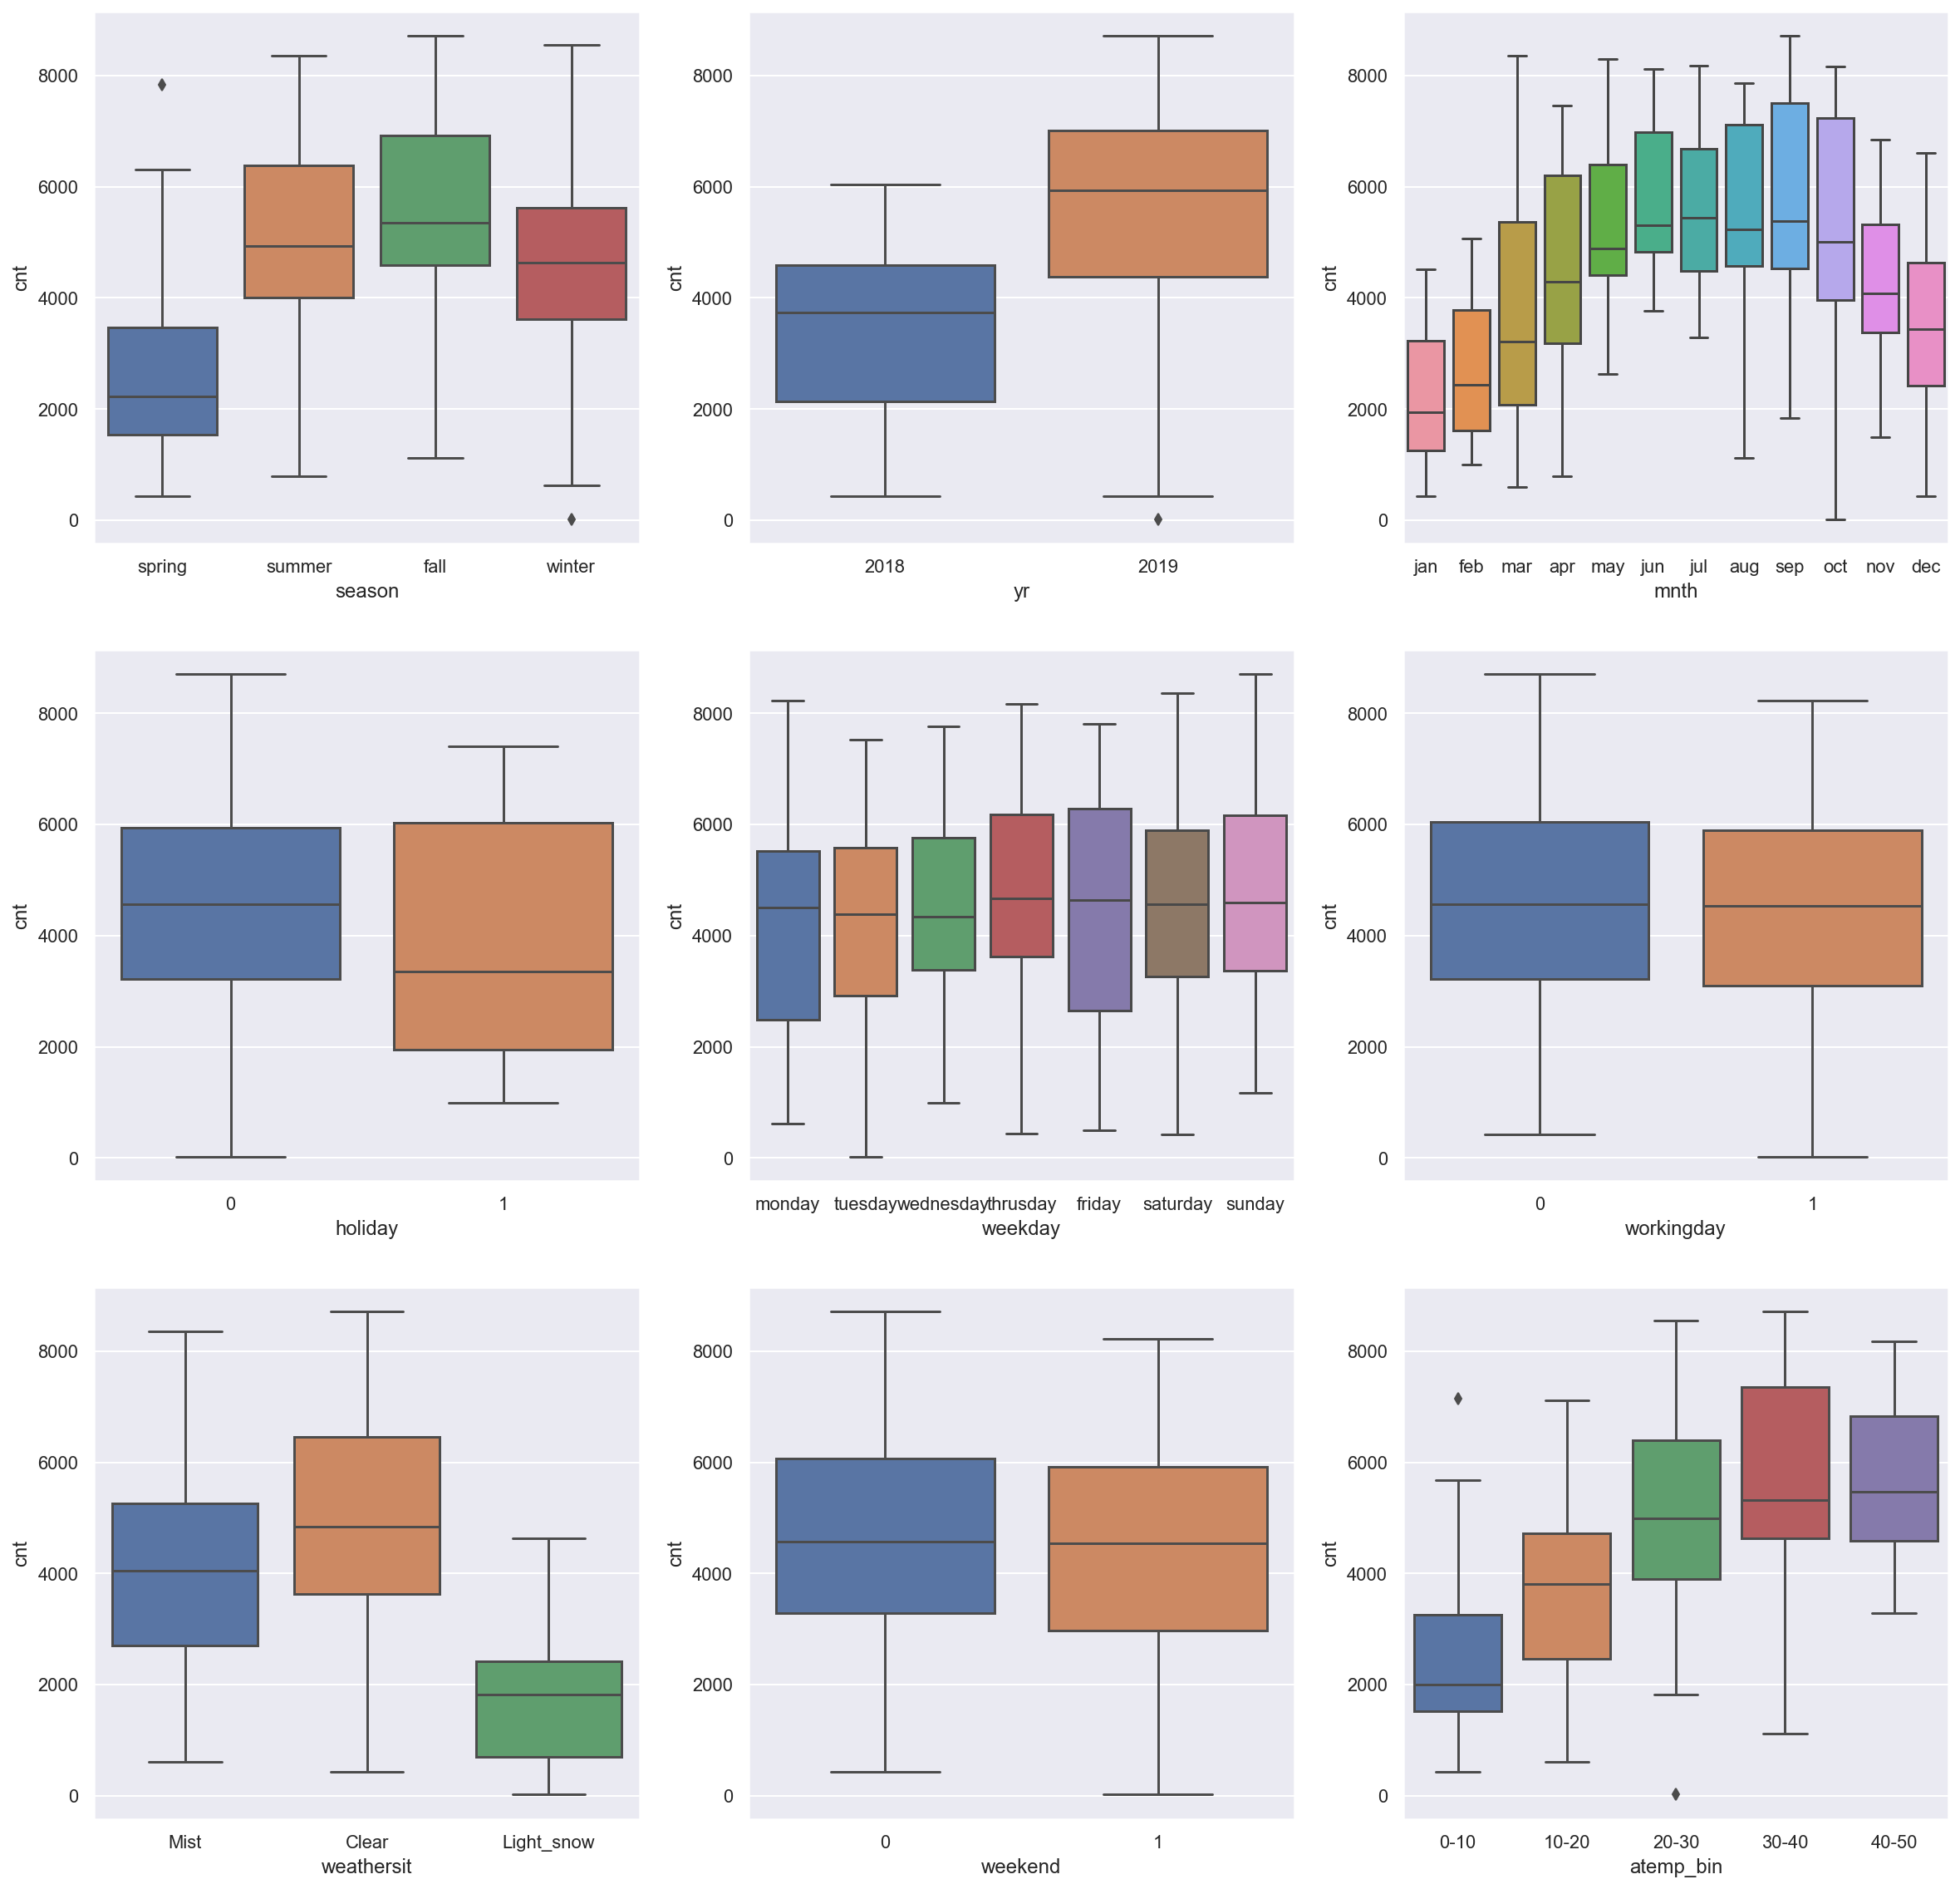

In [16]:
# Checking out the categorical columns and creating inferences.
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x="season",y="cnt",data=bike)
plt.subplot(3,3,2)
sns.boxplot(x="yr",y="cnt",data=bike)
plt.subplot(3,3,3)
sns.boxplot(x="mnth",y="cnt",data=bike)
plt.subplot(3,3,4)
sns.boxplot(x="holiday",y="cnt",data=bike)
plt.subplot(3,3,5)
sns.boxplot(x="weekday",y="cnt",data=bike)
plt.subplot(3,3,6)
sns.boxplot(x="workingday",y="cnt",data=bike)
plt.subplot(3,3,7)
sns.boxplot(x="weathersit",y="cnt",data=bike)
plt.subplot(3,3,8)
sns.boxplot(x="weekend",y="cnt",data=bike)
plt.subplot(3,3,9)
sns.boxplot(x="atemp_bin",y="cnt",data=bike)
plt.show()

Important points to note before reading the inferences are,

1. `Cnt` represents the demand for the bikes.   
2. In case of 0 and 1 in x-axis, 1 shows the variables in X axis is true and 0 represents the opposite of that.

###### 1. Demand for the bikes has been recorded highest during `Fall` season.

###### 2.  There has been a great hike for the bookings in year 2019

###### 3. `From May till October` there is a rise in median values which means that the number of bookings are more during these seasons

###### 4. Boxplot for both `workingday` and `weekends` are same therefore it can be concluded that the number of booking is same all the days of a week.

###### 5. From weathersit boxplot it can be referred that the people mostly preferred the bikes during `Clear, Few clouds, Partly cloudy, Partly cloudy` and  also they completely avoided  the bikes during `Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog`

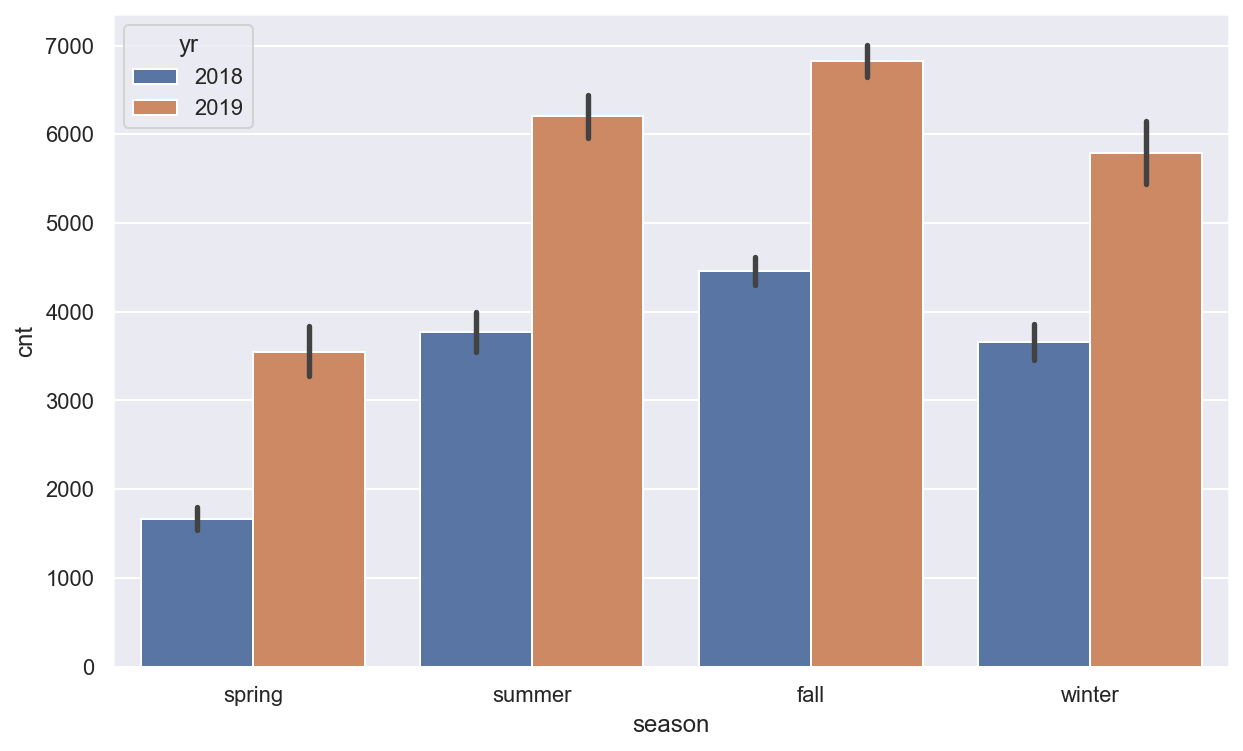

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=bike,x=bike.season,y=bike.cnt,hue=bike.yr)
plt.show()

###### From the bar plots above it is clear that the most of the bikes are rented during summer and fall season, and also in general it can be seen that the count for booking the bikes in year 2019 is higher than 2018

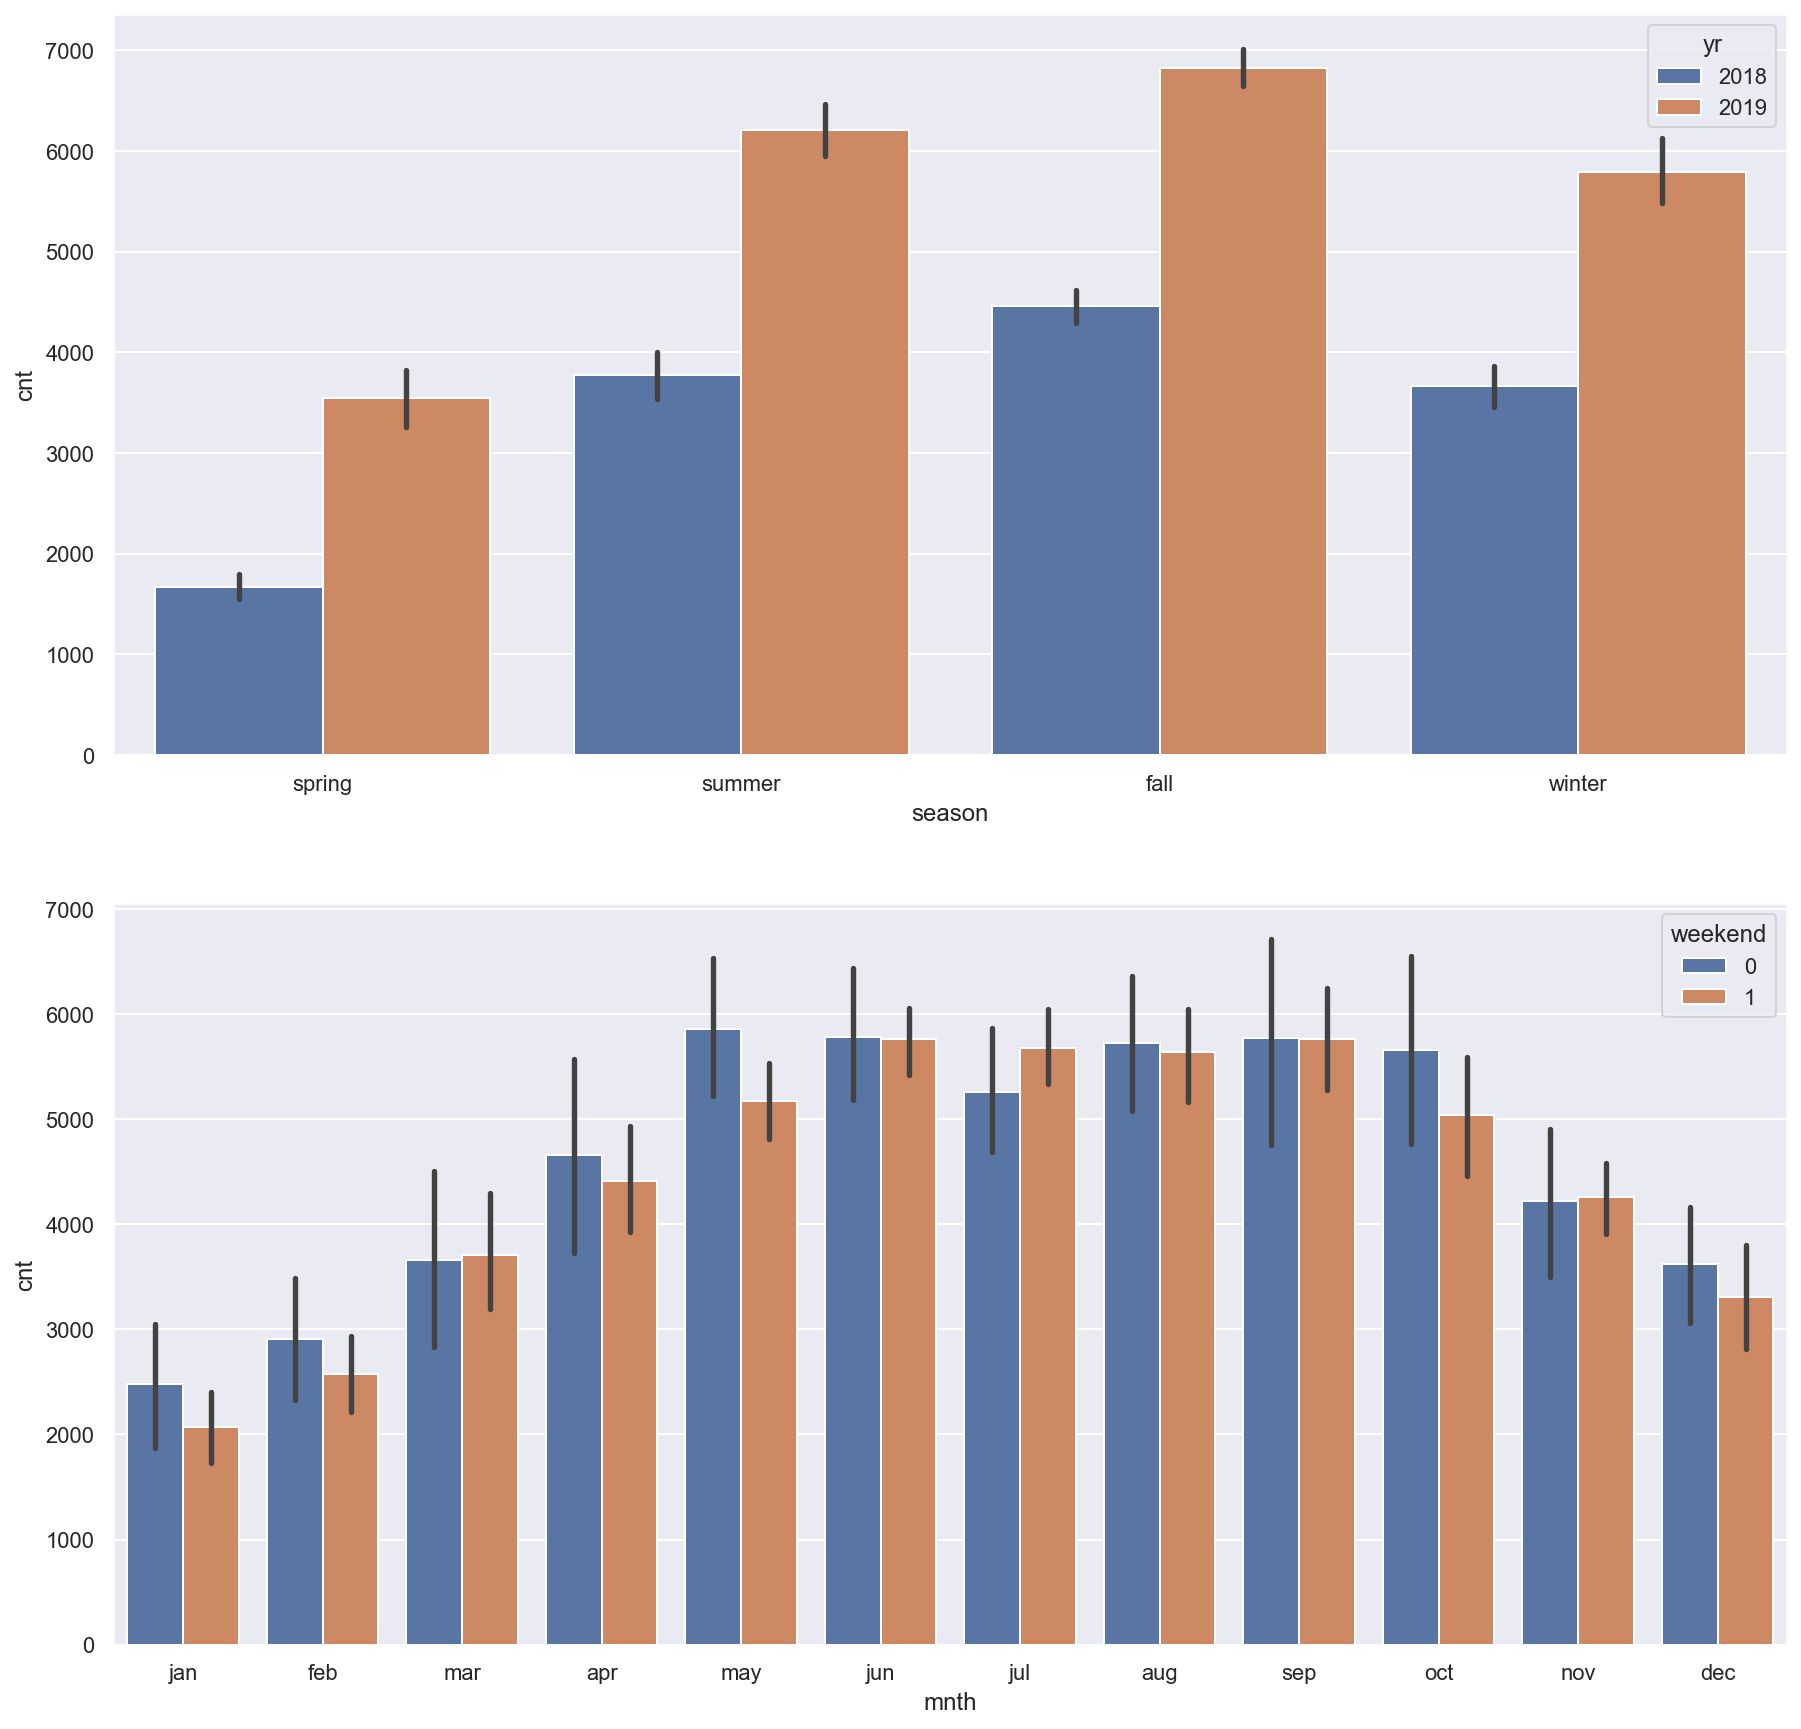

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.barplot(data=bike,x=bike.season,y=bike.cnt,hue=bike.yr)
plt.subplot(2,1,2)
sns.barplot(data=bike,x=bike.mnth,y="cnt",hue=bike.weekend)
plt.show()

######  `From may till october` there is a great hike in the bookings

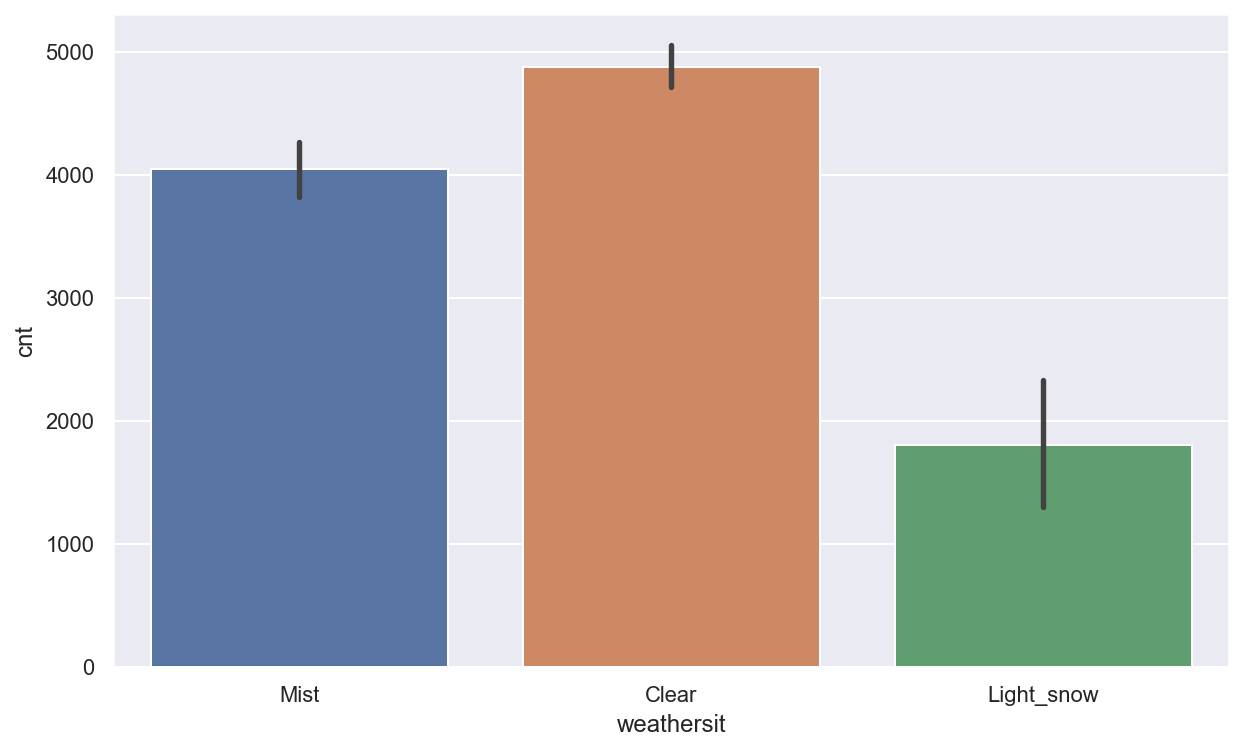

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=bike,y=bike.cnt,x=bike.weathersit)
plt.show()

###### Shared-bikes are mostly preferred during clear weather

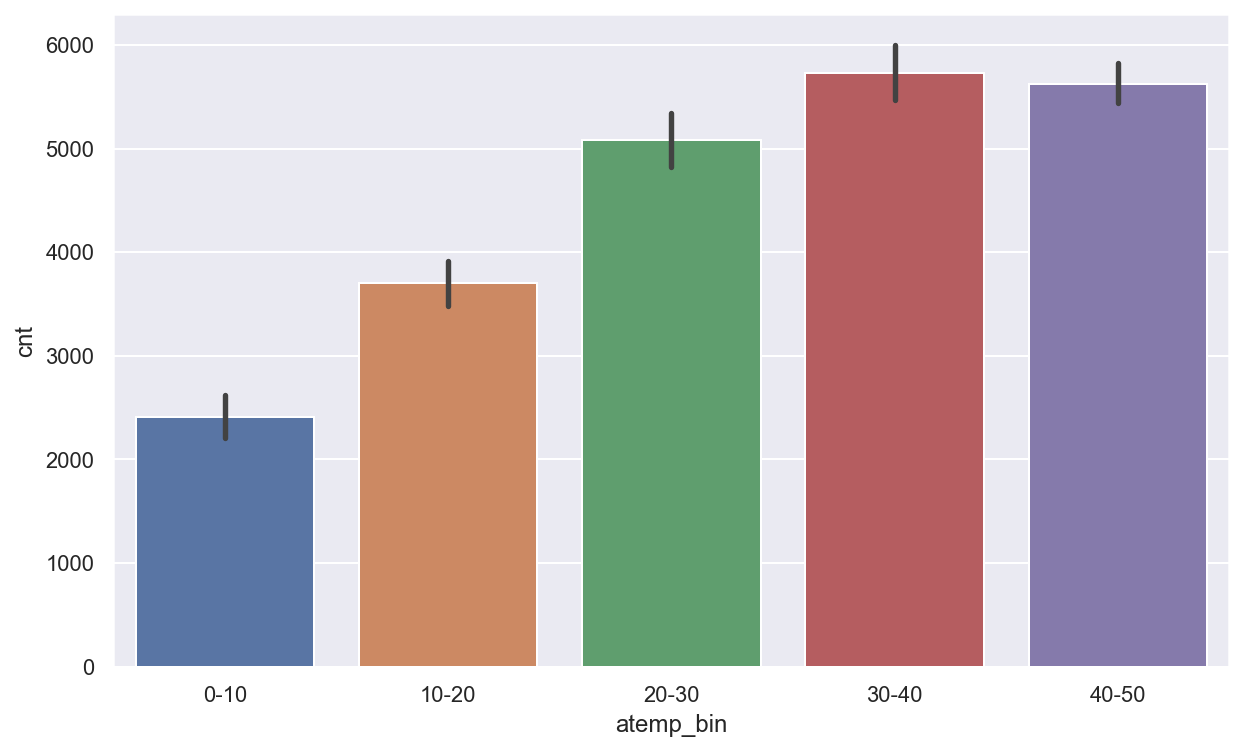

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=bike,y=bike.cnt,x=bike.atemp_bin)
plt.show()

###### Plots above shows us that the bikes are mostly rented during the feeling temperature between 30 to 50 degree Celsius 

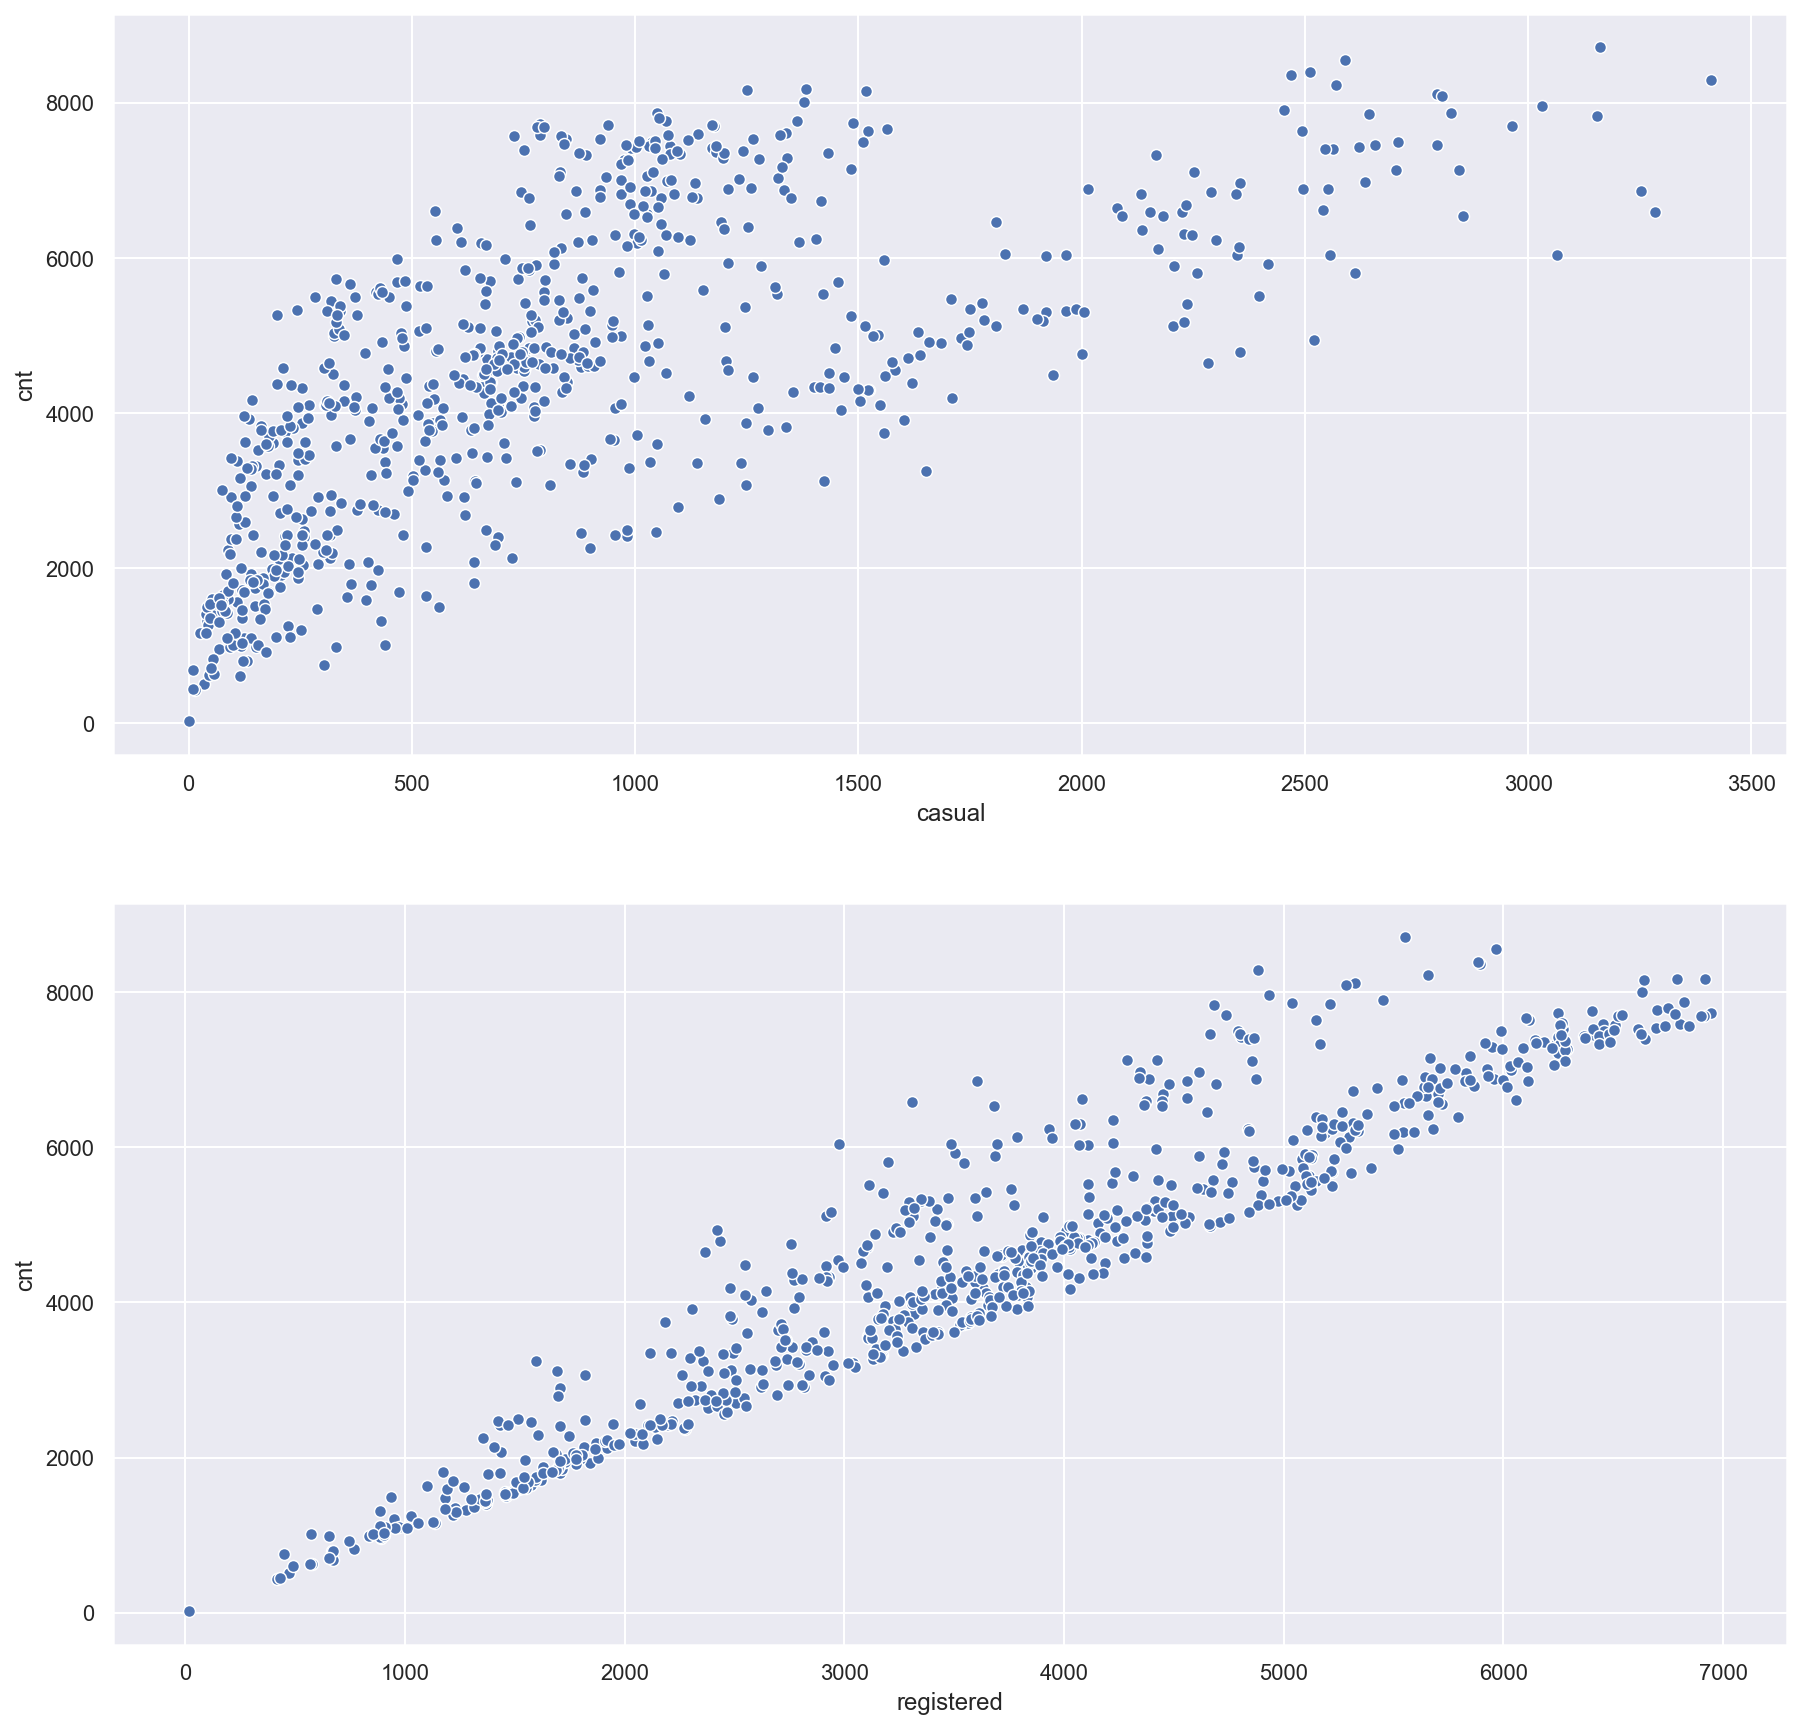

In [21]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.scatterplot(data=bike,x="casual",y="cnt")
plt.subplot(2,1,2)
sns.scatterplot(data=bike,x="registered",y="cnt")
plt.show()

###### From the dictionary as well as the plots tells us that the casual and registered columns are highly correlated with cnt column

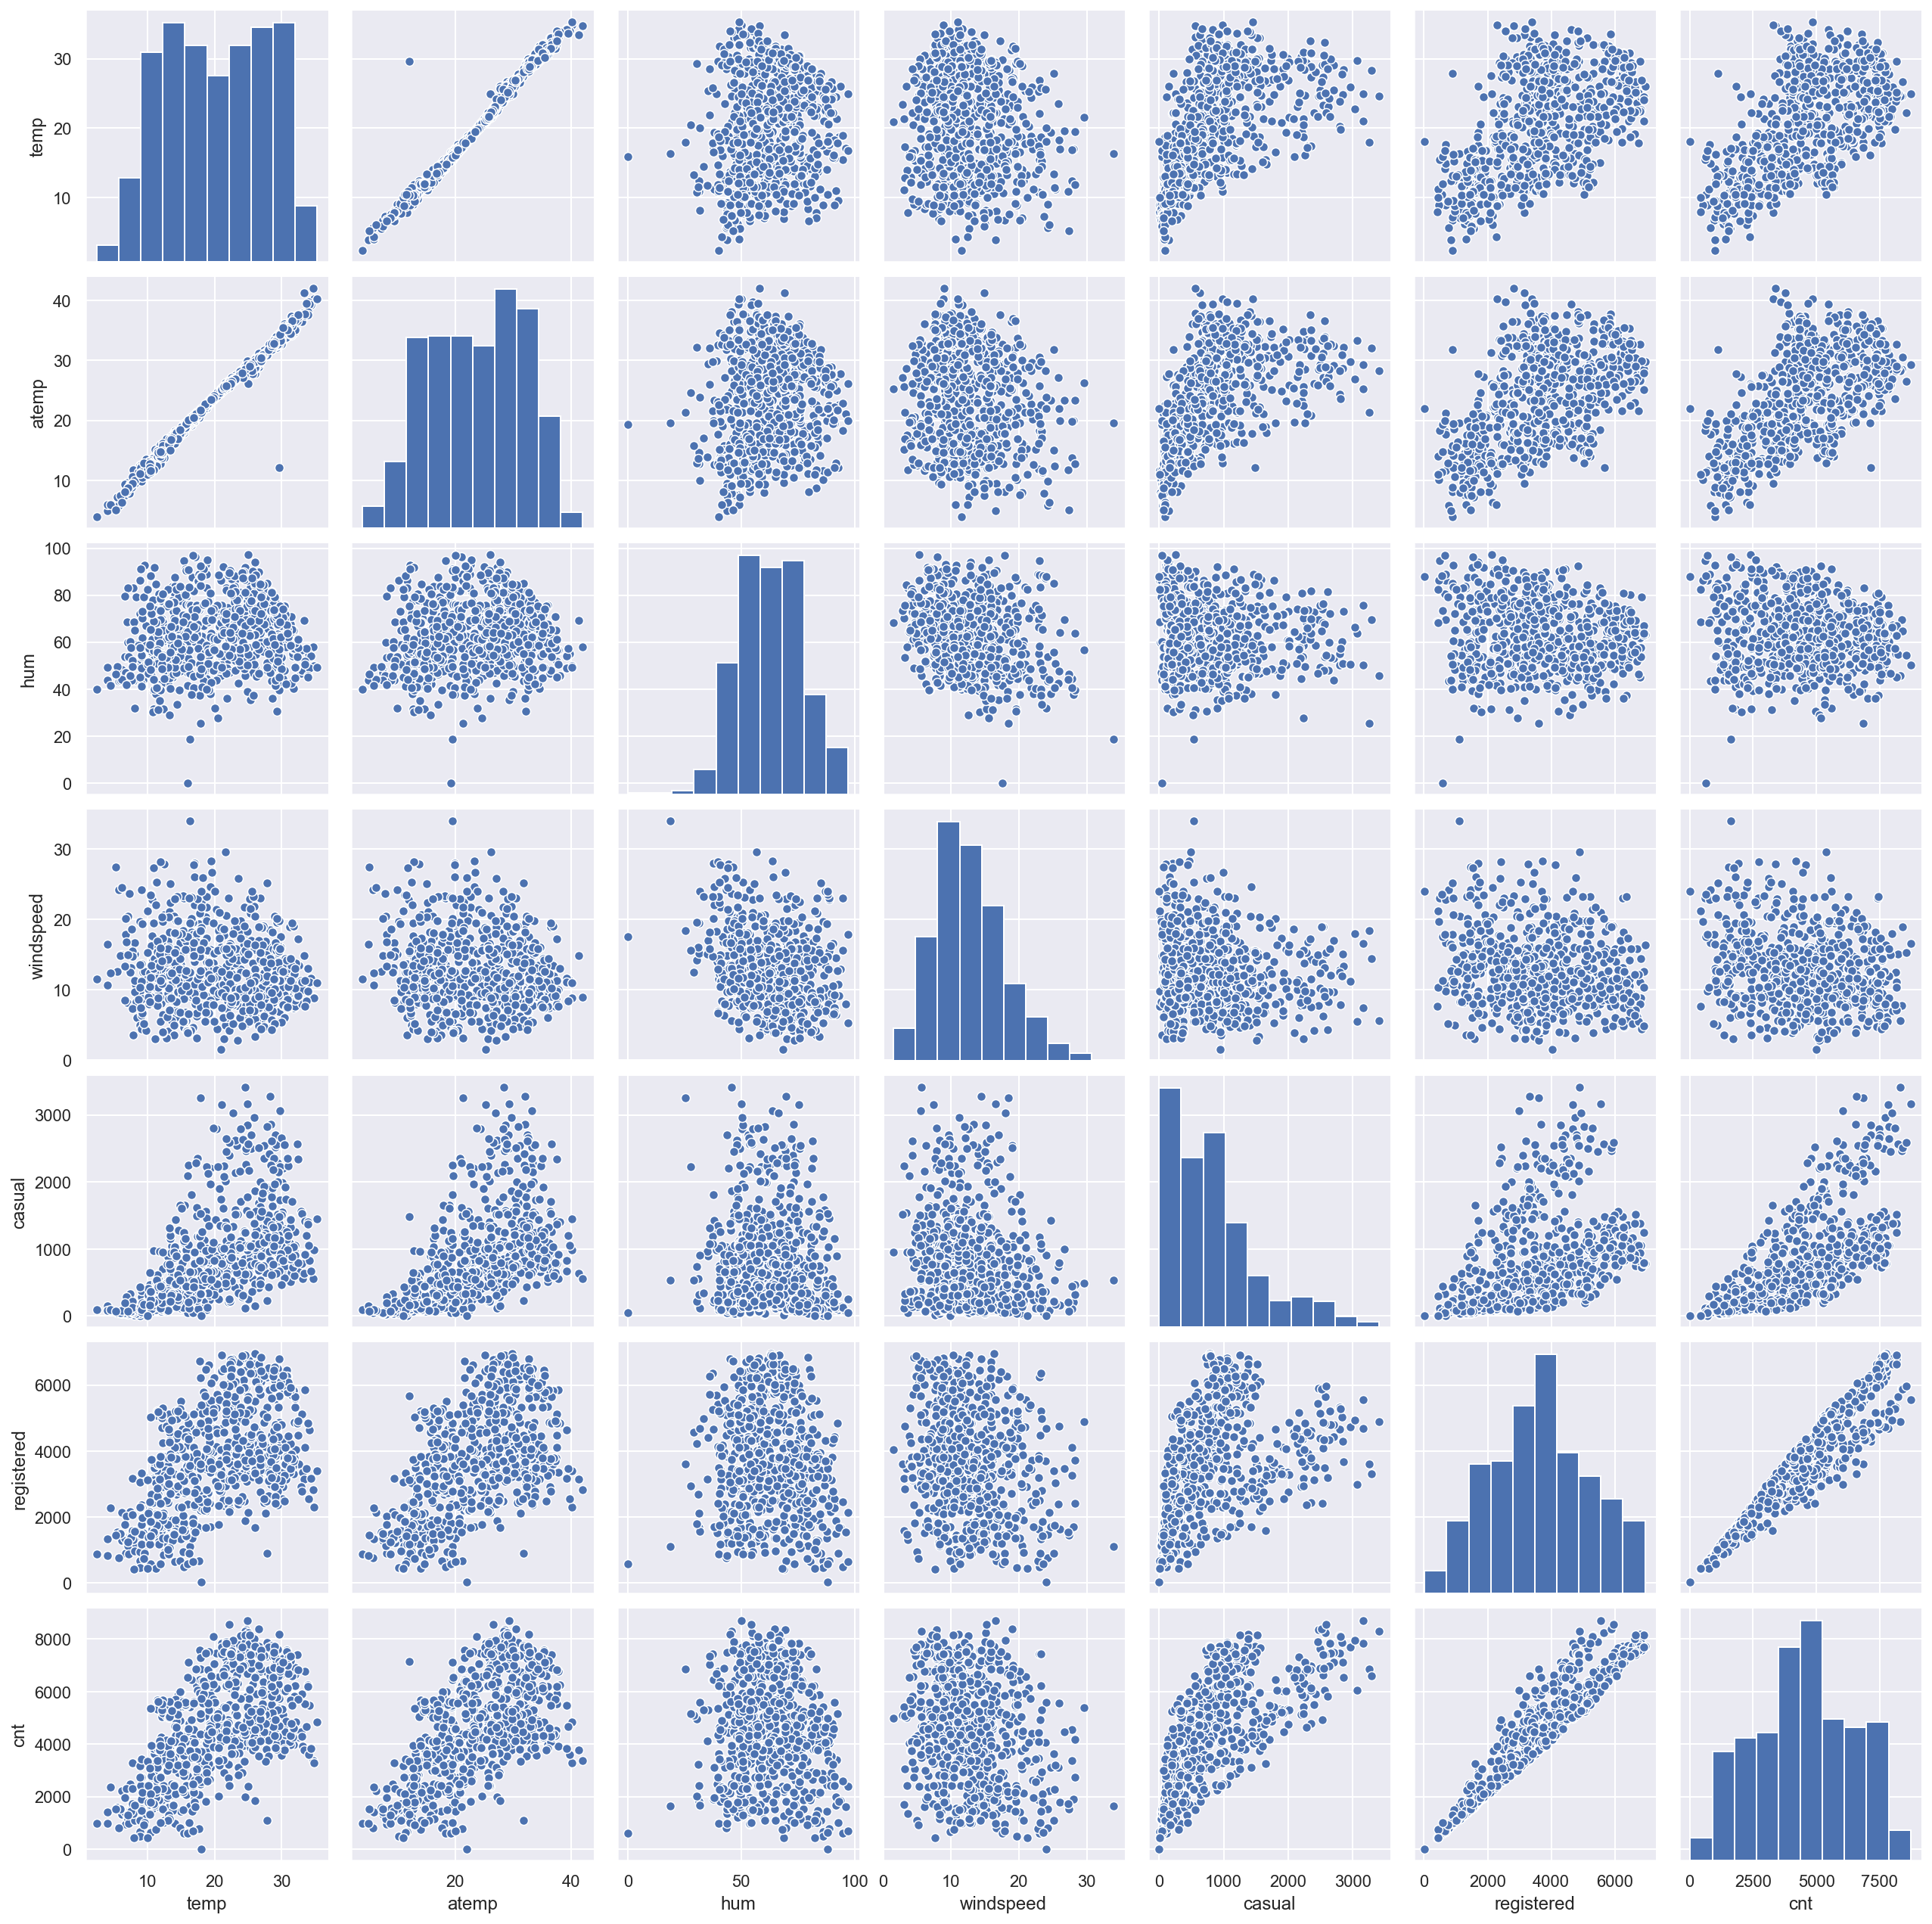

In [22]:
# Checking the numerical variables relation with the target variable with pairplot
sns.pairplot(bike[['temp', 'atemp', 'hum','windspeed', 'casual', 'registered', 'cnt']])
plt.show()

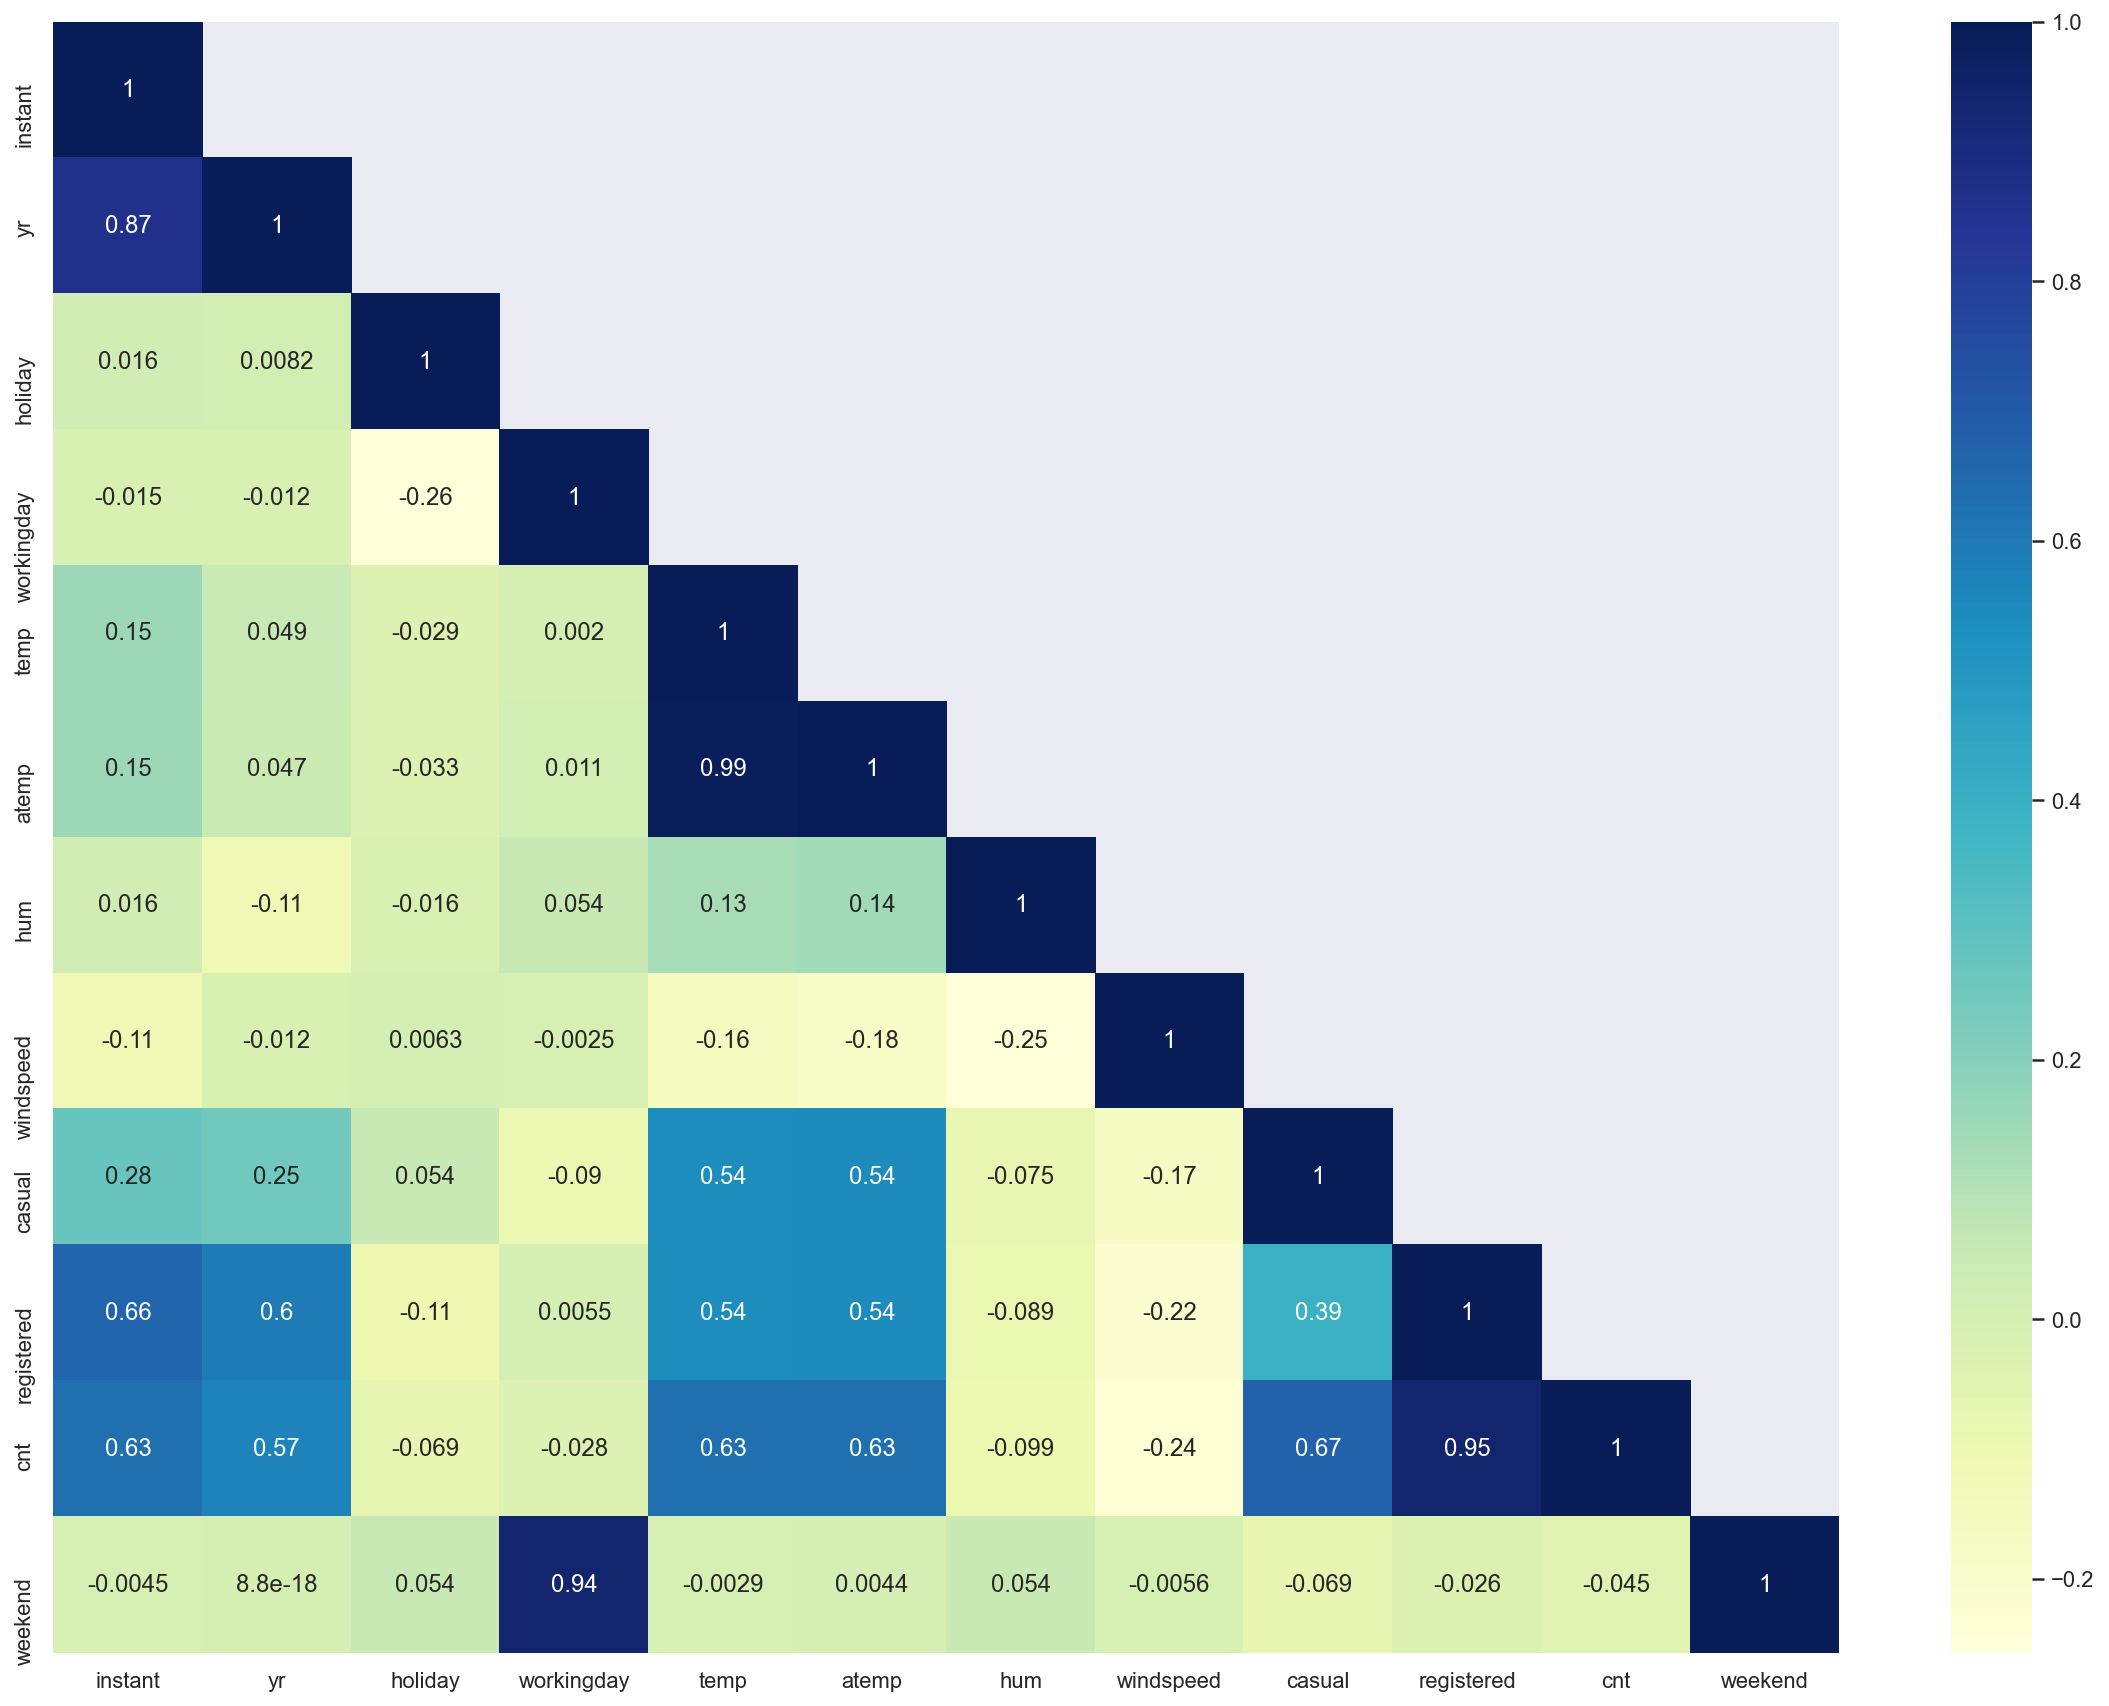

In [23]:
mask = np.array(bike.corr())
mask[np.tril_indices_from(mask)] = False

plt.figure(figsize=(20,15))
sns.heatmap(bike.corr(),mask=mask,annot=True,cmap="YlGnBu")
plt.show()

###### Some of the independent variable which are highly positively correlated with the target variables are                                         registered, casual, atemp, temp, instant and yr 
###### However some of the independent varables are correlated and hence will show multicollinearity in later stages such as, atemp and temp, weekend and workingday. Therefore one of them can be dropped.

### 3. Data preparation

In [24]:
# Dropping the columns based on their use and Multicollinearity 
bike = bike[['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'cnt',
 "atemp_bin"]]

### Creating dummy variables

In [25]:
#Creating binary variables for year column
bike['yr'] = bike['yr'].replace({2018:0,2019:1})

In [26]:
#For categorical valriables dummy variable needs to be created 
dumm_list = ["season","mnth","weekday","weathersit","atemp_bin"]
for i in dumm_list:
    j = pd.get_dummies(bike[i],drop_first=True)
    bike = pd.concat([bike,j], axis=1)
    bike = bike.drop(columns=i)

In [27]:
bike.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0   0        0           1  14.110847  80.5833  10.749882   985       1   
1   0        0           1  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  ...  sunday  thrusday  tuesday  wednesday  Light_snow  \
0       0       0  ...       0         0        0          0           0   
1       0       0  ...       0         0        1          0           0   
2       0       0  ...       0         0        0          1           0   
3       0       0  ...       0         1        0          0           0   
4       0       0  ...       0         0        0          0           0   

   Mist  10-20  20-30  30-40  40-50  
0     1      1      0      0      0  
1     1      1      0      0      0  
2     0      0      0      0      0  
3     0      0      0      0      0  
4     0      0      0      0      0  

[5 rows x 33 columns]

In [28]:
# List of final columns which will be used for building the Linear regression model
list(bike.columns)

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'cnt',
 'spring',
 'summer',
 'winter',
 'aug',
 'dec',
 'feb',
 'jan',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep',
 'monday',
 'saturday',
 'sunday',
 'thrusday',
 'tuesday',
 'wednesday',
 'Light_snow',
 'Mist',
 '10-20',
 '20-30',
 '30-40',
 '40-50']

### 4. Splitting the data into train-test set

In [29]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(bike,train_size=0.7,test_size=0.3,random_state=100)

#### Rescaling the columns

In [30]:
# Rescaling the variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
num_vars = ["temp","hum",'windspeed',"cnt"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

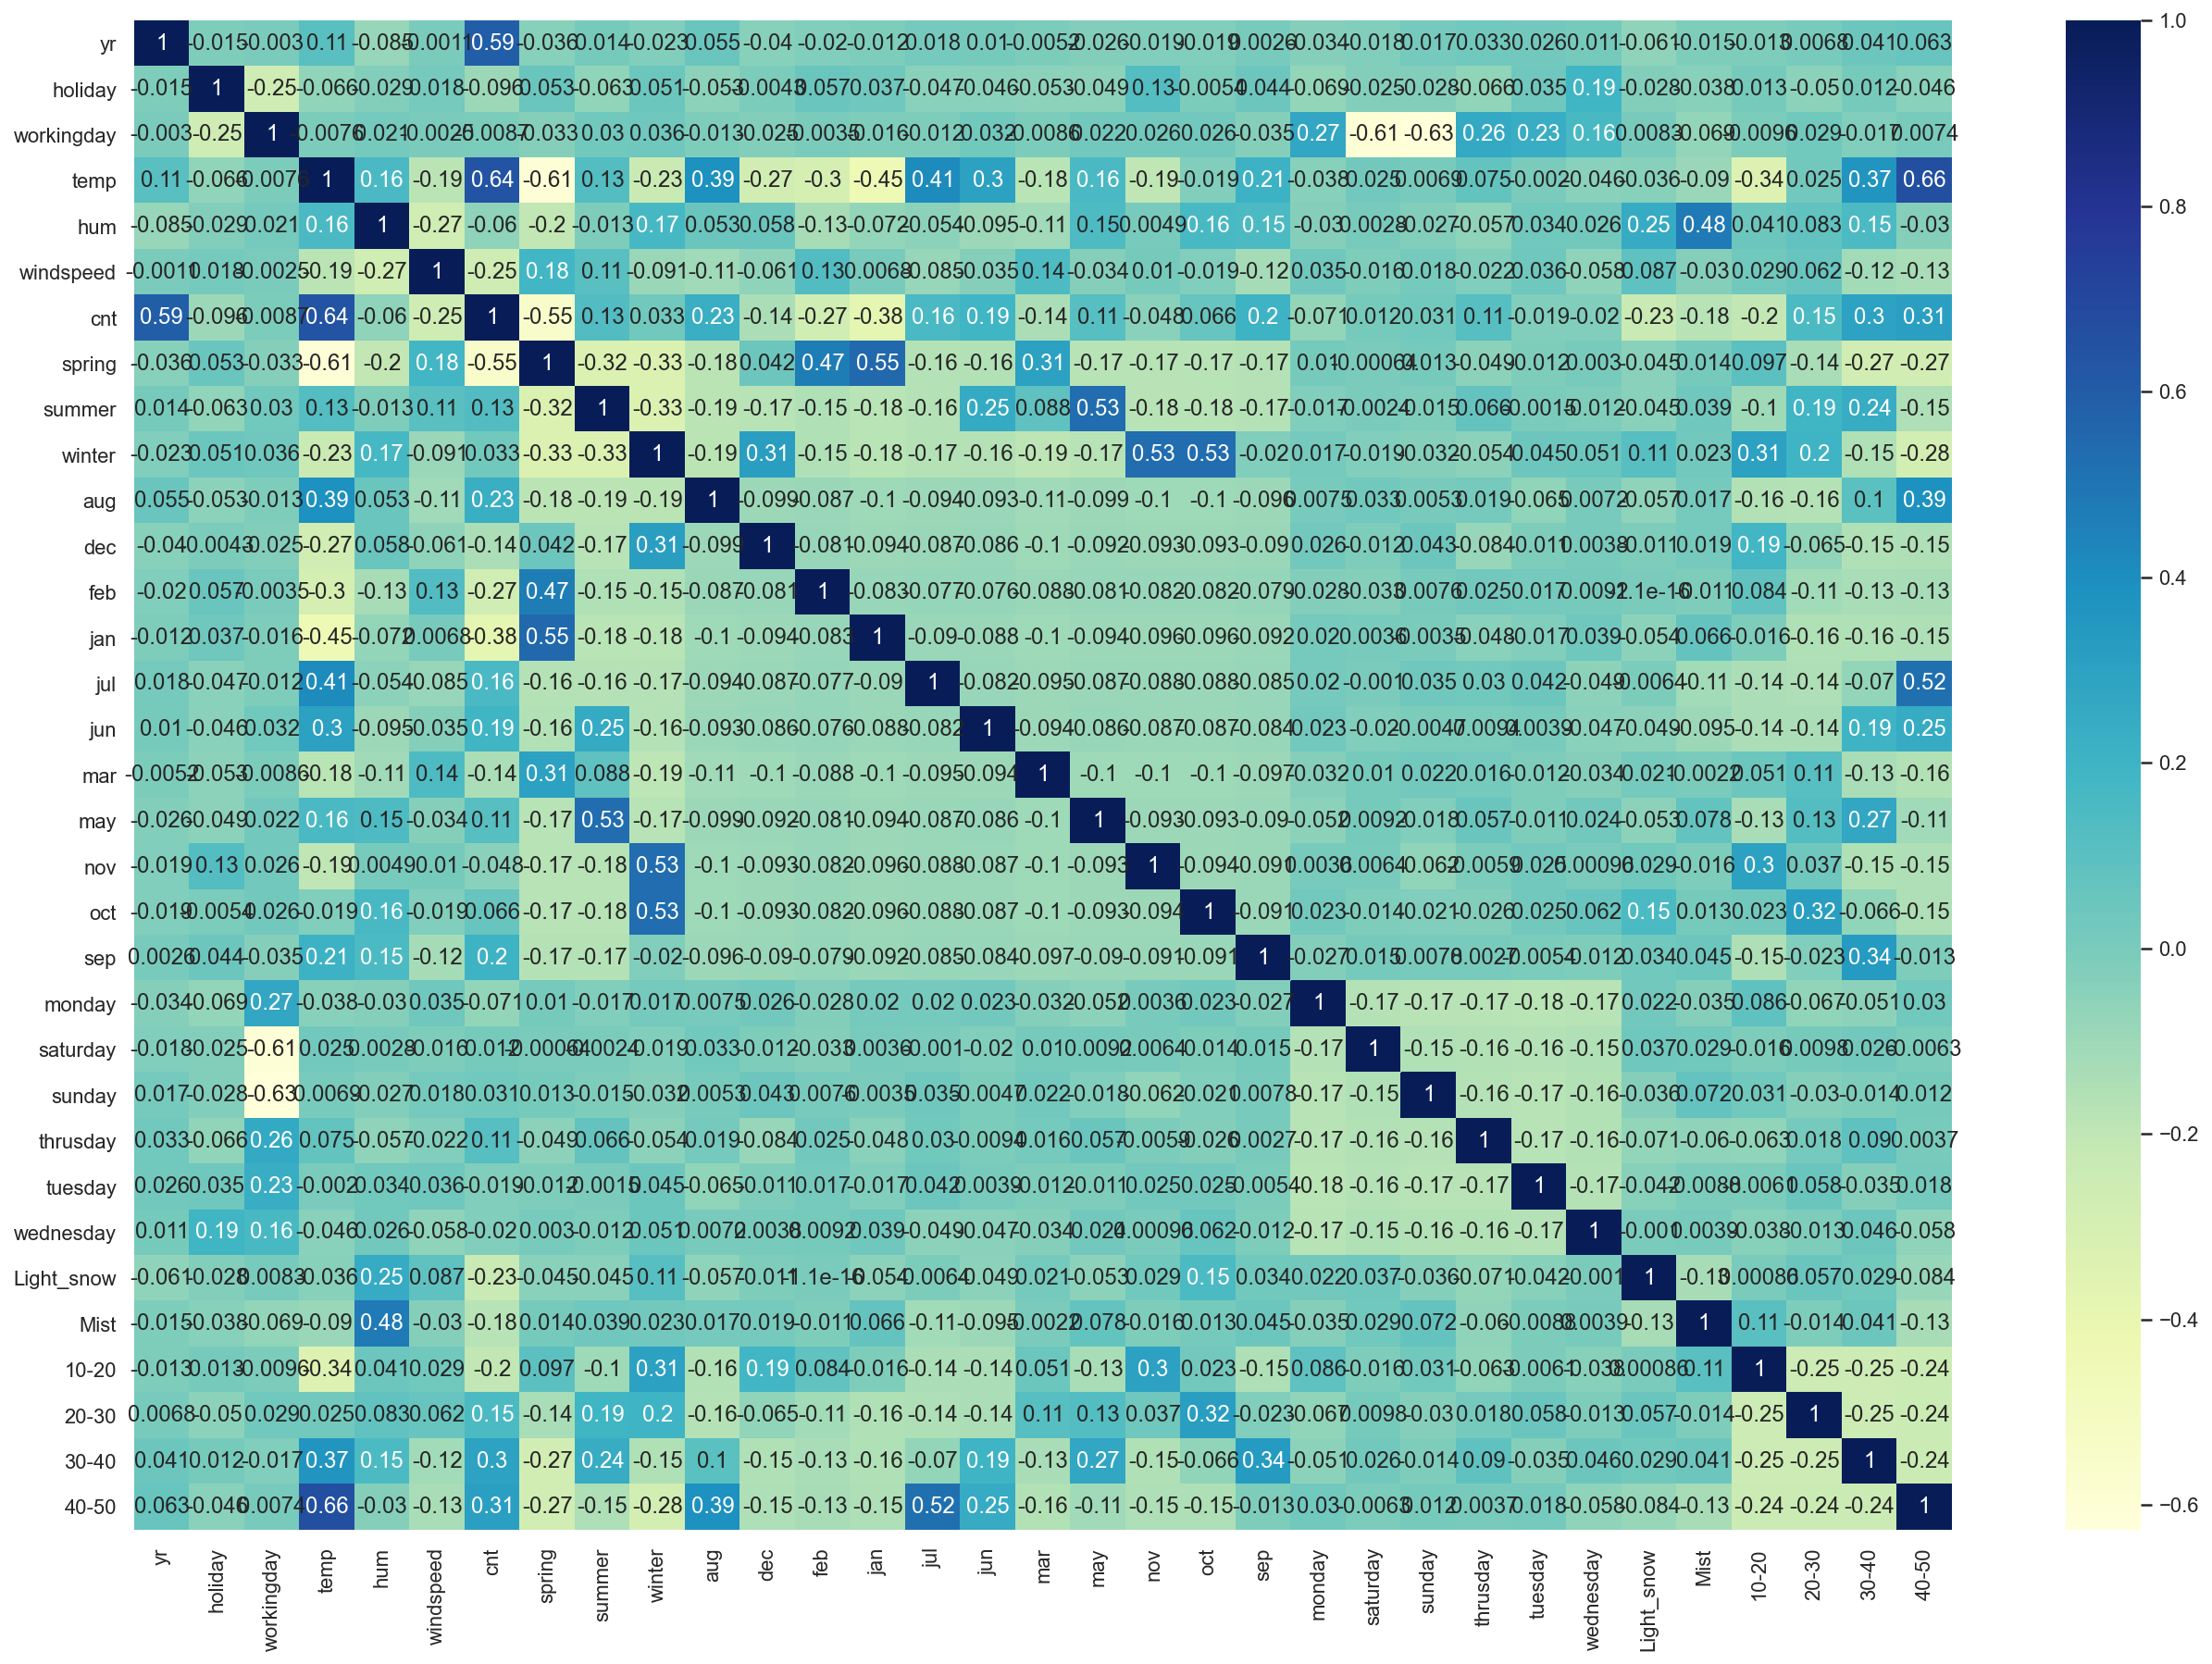

In [32]:
plt.figure(figsize=(22,15))
sns.heatmap(df_train.corr(),cmap='YlGnBu',annot=True)
plt.show()

### Dividing the data into X and y set

In [33]:
y = df_train.pop('cnt')
X = df_train

## 5.Building the model using RFE (Recursive Feature Elimination)

### Running first model (lm_1)

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

from sklearn.feature_selection import RFE
rfe = RFE(lm,15)   # Selecting the top 15 columns
rfe = rfe.fit(X,y)

In [35]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1),
 ('aug', False, 3),
 ('dec', False, 7),
 ('feb', False, 16),
 ('jan', True, 1),
 ('jul', False, 13),
 ('jun', False, 4),
 ('mar', False, 9),
 ('may', False, 5),
 ('nov', False, 6),
 ('oct', False, 17),
 ('sep', True, 1),
 ('monday', False, 8),
 ('saturday', False, 11),
 ('sunday', False, 12),
 ('thrusday', False, 18),
 ('tuesday', False, 2),
 ('wednesday', False, 14),
 ('Light_snow', True, 1),
 ('Mist', True, 1),
 ('10-20', True, 1),
 ('20-30', True, 1),
 ('30-40', True, 1),
 ('40-50', True, 1)]

In [36]:
col = X.columns[rfe.support_]
X = X[col]

### Building first modle lm_1

In [37]:
import statsmodels.api as sm
X = sm.add_constant(X)
X_lm1 = sm.OLS(y,X).fit()
print(X_lm1.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X.drop(columns="const")
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     199.1
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          2.80e-198
Time:                        20:16:19   Log-Likelihood:                 536.40
No. Observations:                 510   AIC:                            -1041.
Df Residuals:                     494   BIC:                            -973.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3744      0.032     11.558      0.0

Feature    VIF
2         temp  79.57
3          hum  26.86
14       40-50  19.72
13       30-40  13.41
12       20-30   7.00
4    windspeed   4.47
11       10-20   3.27
5       spring   3.17
6       winter   2.42
10        Mist   2.27
0           yr   2.08
7          jan   1.74
8          sep   1.27
9   Light_snow   1.23
1      holiday   1.05

###### P-value for 40-50 column is quite high which means it is not significant, therefore it can be dropped.

### Building second modle lm_2

In [38]:
X = X.drop(columns="40-50")
X = sm.add_constant(X)
X_lm2 = sm.OLS(y,X).fit()
print(X_lm2.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X.drop(columns="const")
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     212.4
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          7.37e-199
Time:                        20:16:20   Log-Likelihood:                 534.98
No. Observations:                 510   AIC:                            -1040.
Df Residuals:                     495   BIC:                            -976.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3538      0.030     11.804      0.0

Feature    VIF
3          hum  24.02
2         temp  14.05
4    windspeed   4.08
5       spring   2.99
6       winter   2.35
10        Mist   2.24
0           yr   2.07
13       30-40   1.89
11       10-20   1.86
12       20-30   1.75
7          jan   1.72
8          sep   1.27
9   Light_snow   1.21
1      holiday   1.05

###### P-value for 10-20 column is quite high which means it is not significant, therefore it can be dropped.

### Building third modle lm_3

In [39]:
X = X.drop(columns="10-20")
X = sm.add_constant(X)
X_lm3 = sm.OLS(y,X).fit()
print(X_lm3.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X.drop(columns="const")
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          1.82e-199
Time:                        20:16:20   Log-Likelihood:                 533.60
No. Observations:                 510   AIC:                            -1039.
Df Residuals:                     496   BIC:                            -979.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3604      0.030     12.111      0.0

Feature    VIF
3          hum  22.79
2         temp  13.71
4    windspeed   4.03
5       spring   2.97
10        Mist   2.24
6       winter   2.19
0           yr   2.06
12       30-40   1.78
7          jan   1.67
11       20-30   1.47
8          sep   1.26
9   Light_snow   1.21
1      holiday   1.05

###### VIF for `hum` is high which shows multicollinearity , therefore it can be dropped.

In [40]:
X = X.drop(columns="hum")
X = sm.add_constant(X)
X_lm3 = sm.OLS(y,X).fit()
print(X_lm3.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_v = X.drop(columns="const")
vif = pd.DataFrame()
vif['Feature'] = X_v.columns
vif['VIF'] = [variance_inflation_factor(X_v.values, i) for i in range(X_v.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     234.7
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          6.53e-196
Time:                        20:16:20   Log-Likelihood:                 522.31
No. Observations:                 510   AIC:                            -1019.
Df Residuals:                     497   BIC:                            -963.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2687      0.023     11.633      0.0

Feature   VIF
2         temp  4.37
3    windspeed  4.00
4       spring  2.28
0           yr  2.06
11       30-40  1.76
6          jan  1.61
9         Mist  1.52
5       winter  1.45
10       20-30  1.45
7          sep  1.26
8   Light_snow  1.09
1      holiday  1.05

## 7. Residual analysis of train data

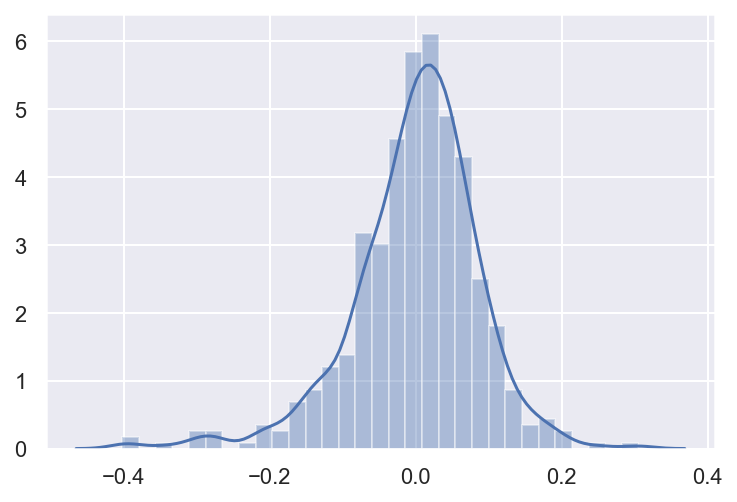

In [41]:
y_pred = X_lm3.predict(X)
res = y-y_pred

sns.distplot(res)
plt.show()

## 7. Making predictions on test set

In [42]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [43]:
df_test = df_test[['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'jan', 'sep', 'Light_snow', 'Mist', '20-30', '30-40', "cnt"]]

In [44]:
df_test.head()

yr  holiday      temp  windspeed  spring  winter  jan  sep  Light_snow  \
184   0        1  0.831783   0.084219       0       0    0    0           0   
535   1        0  0.901354   0.153728       0       0    0    0           0   
299   0        0  0.511964   0.334206       0       1    0    0           0   
221   0        0  0.881625   0.339570       0       0    0    0           0   
152   0        0  0.817246   0.537414       0       0    0    0           0   

     Mist  20-30  30-40       cnt  
184     1      0      0  0.692706  
535     0      0      0  0.712034  
299     1      1      0  0.303382  
221     0      0      0  0.547400  
152     0      0      0  0.569029

### Diving into X and y test set

In [45]:
y = df_test.pop('cnt')
X = df_test

In [46]:
X = sm.add_constant(X)
X_lm = sm.OLS(y,X).fit()

In [47]:
y_pred = X_lm.predict(X)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y,y_pred)
r2  = r2_score(y,y_pred)

print('Mean_Squared_Error :' ,round(mse,5))
print('r_square_value :',round(r2,5))

Mean_Squared_Error : 0.00747
r_square_value : 0.8427


###### Above model has a fairly high adjusted R-squared value and also the R-squared value for train and test model is almost similar therefore we it can be concluded that we have got the right model, also the graph between the predicted and actual y value linear so now we can use this model to predict the demand for the shared bikes. 

## 8.Model evaluation

Text(0, 0.5, 'y_pred')

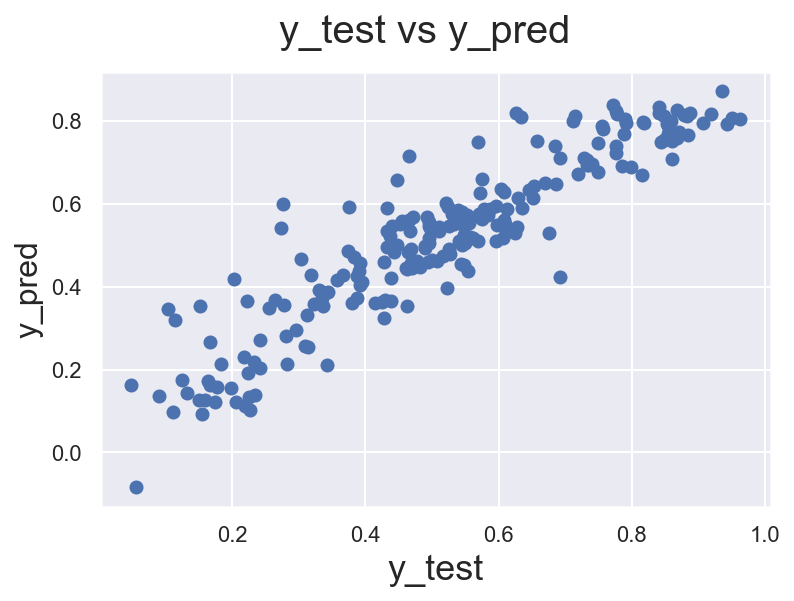

In [49]:
fig = plt.figure()
plt.scatter(y,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)           
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)                    

###### We can see that the equation of our best fitted line is:

$ price = 0.2349 \times  yr -0.0914   \times  holiday + 0.3675 \times temp -0.1546 \times windspeed -0.0926 \times spring + 0.0406 \times winter -0.0385 \times jan + 0.0489 \times sep + -0.3017 \times Light_snow -0.0805 \times Mist +0.0777 \times 20-30   + 0.0638 \times 30-40 $